../campaign/precision5820/org.choco.choco-v4.10.15.csv : Number of erroneous rows:  1
../campaign/precision5820/org.choco.choco-v4.10.15.csv 9    ../data/mzn-challenge/2022/generalized-peacabl...
Name: data_file, dtype: object


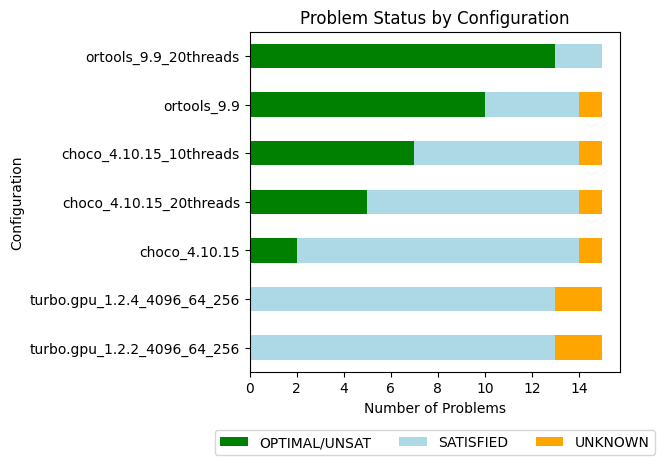

,uid,version,machine,short_uid,avg_nodes_per_second,median_nodes_per_second,avg_normalized_nodes_per_second,best_nodes_per_second,avg_fp_iterations_per_second,median_fp_iterations_per_second,avg_normalized_fp_iterations_per_second,best_fp_iterations_per_second,avg_fp_iterations,median_fp_iterations,avg_normalized_fp_iterations,best_fp_iterations,avg_propagator_mem_mb,median_propagator_mem_mb,avg_normalized_propagator_mem_mb,best_propagator_mem_mb,avg_store_mem_kb,avg_normalized_store_mem_kb,best_store_mem_kb,median_store_mem_kb,problem_optimal,problem_sat,problem_unknown,problem_with_store_shared,problem_with_props_shared,idle_eps_workers
3,org.choco.choco_4.10.15_precision5820_300s_10threads,4.10.15,precision5820,choco_4.10.15_10threads,26081.152693,4758.209194,0.0,0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,15,0.000000,0.00000,0.0,15,0.0000,0.0,15,0.000,7,7,1,0,0,0.0
6,turbo.gpu.release_1.2.4_precision5820_300s_4096_64_256,1.2.4,precision5820,turbo.gpu_1.2.4_4096_64_256,17939.551829,6700.386252,0.0,0,592058.789624,126229.918421,0.0,0,41.426303,24.395553,0.0,15,0.955103,0.45586,0.0,15,442.4648,0.0,15,177.908,0,13,2,5,0,2.0
0,com.google.ortools.sat_9.9_precision5820_300s,9.9,precision5820,ortools_9.9,13453.801224,742.477272,0.0,0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,15,0.000000,0.00000,0.0,15,0.0000,0.0,15,0.000,10,4,1,0,0,0.0
2,org.choco.choco_4.10.15_precision5820_300s,4.10.15,precision5820,choco_4.10.15,11527.580738,3370.110000,0.0,0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,15,0.000000,0.00000,0.0,15,0.0000,0.0,15,0.000,2,12,1,0,0,0.0
5,turbo.gpu.release_1.2.2_precision5820_300s_4096_64_256,1.2.2,precision5820,turbo.gpu_1.2.2_4096_64_256,10754.390443,2017.985887,0.0,0,61329.068929,30440.383731,0.0,0,16.950205,8.609178,0.0,15,0.000000,0.00000,0.0,15,0.0000,0.0,15,0.000,0,13,2,10,0,2.0
4,org.choco.choco_4.10.15_precision5820_300s_20threads,4.10.15,precision5820,choco_4.10.15_20threads,9564.200520,2068.891360,0.0,0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,15,0.000000,0.00000,0.0,15,0.0000,0.0,15,0.000,5,9,1,0,0,0.0
1,com.google.ortools.sat_9.9_precision5820_300s_20threads,9.9,precision5820,ortools_9.9_20threads,61.683853,12.825956,0.0,0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,15,0.000000,0.00000,0.0,15,0.0000,0.0,15,0.000,13,2,0,0,0,0.0


| short_uid                   |   avg_nodes_per_second |   problem_optimal |   problem_sat |   problem_unknown |
|:----------------------------|-----------------------:|------------------:|--------------:|------------------:|
| ortools_9.9_20threads       |                61.6839 |                13 |             2 |                 0 |
| ortools_9.9                 |             13453.8    |                10 |             4 |                 1 |
| choco_4.10.15_10threads     |             26081.2    |                 7 |             7 |                 1 |
| choco_4.10.15_20threads     |              9564.2    |                 5 |             9 |                 1 |
| choco_4.10.15               |             11527.6    |                 2 |            12 |                 1 |
| turbo.gpu_1.2.4_4096_64_256 |             17939.6    |                 0 |            13 |                 2 |
| turbo.gpu_1.2.2_4096_64_256 |             10754.4    |                 0 |            13 |    

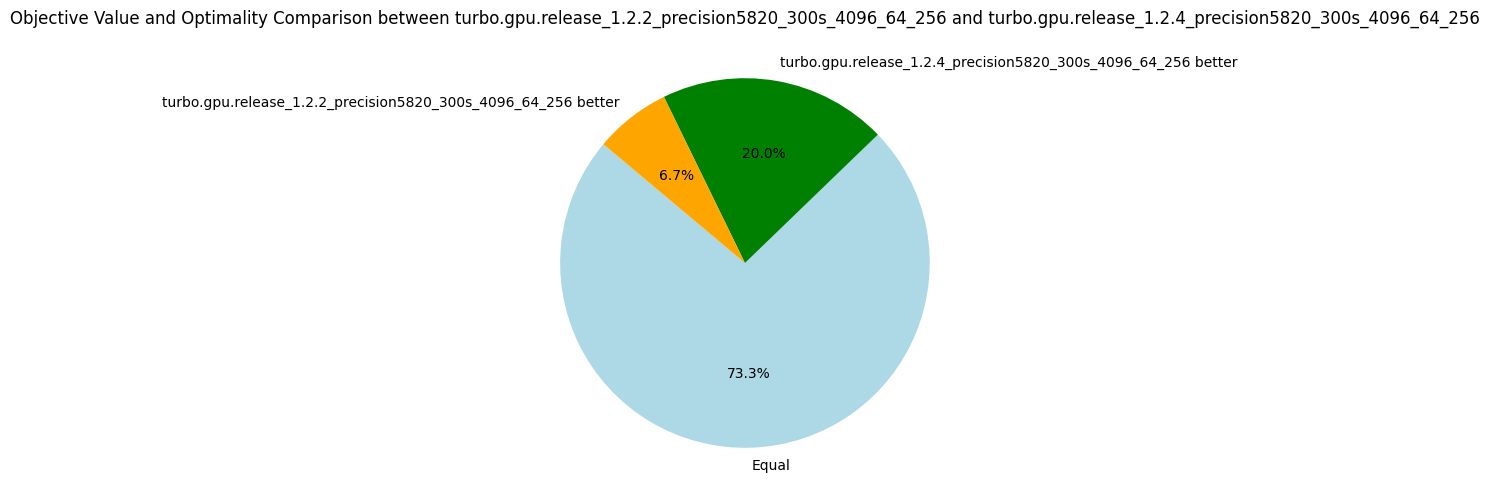

In [1]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

df = analysis.read_experiments([
  "../campaign/precision5820/com.google.ortools.sat-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat.noglobal-v9.9.csv",
  "../campaign/precision5820/com.google.ortools.sat-v9.9-par.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par-java11.csv",
  "../campaign/precision5820/org.choco.choco-v4.10.15.csv",
  "../campaign/precision5820/org.choco.choco-v4.10.15-par.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.1.7-A5000.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.cpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.1.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv"
])
# df.to_csv("test.csv", index=False)
# df = df[~(df['problem'] == "rcpsp")]
# df = df[df['problem'] == "rcpsp"]

# Because globalmem was only benchmarked on problems that could fit in shared memory.
# But we don't want to remove the others for most of the analysis. (comment the line if you want to analyse the globalmem results)
df = df[df['uid'] != "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256_globalmem"]

df = analysis.intersect(df)

analysis.plot_overall_result(df)
# display(HTML(analysis.metrics_table(df[df['mzn_solver'].str.startswith("turbo")]).to_html()))
metrics = analysis.metrics_table(df)
display(HTML(metrics.to_html()))
sorted_metrics = metrics.sort_values(by=['problem_optimal', 'problem_sat', 'avg_nodes_per_second', 'version'], ascending=[False, False, False, True])
print(sorted_metrics[['short_uid','avg_nodes_per_second','problem_optimal', 'problem_sat', 'problem_unknown']].to_markdown(index=False))

# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_256")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.2_precision5820_300s_4096_64_256")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.2_precision5820_300s_4096_64_256")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.1.7_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.cpu.release_1.2.0_precision5820_300s")

# print(analysis.list_problem_where_leq(df, "nodes", "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_1024"))

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_256")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.2_precision5820_300s_4096_64_256")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.2_precision5820_300s_4096_64_256")
# print(p[p['Comparison'] == 'turbo.gpu.release_1.1.7_precision5820_300s_4096_64_256 better'])

# _ = analysis.compare_solvers_pie_chart(df, "com.google.ortools.sat_9.9_precision5820_300s", "com.google.ortools.sat.noglobal_9.9_precision5820_300s")
# _ = analysis.compare_solvers_pie_chart(df, "com.google.ortools.sat_9.9_precision5820_300s", "com.google.ortools.sat_9.9_precision5820_300s_20threads")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.cpu.release_1.2.0_precision5820_300s", "org.choco.choco_4.10.15_precision5820_300s")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.cpu.release_1.2.0_precision5820_300s", "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256_noatomics", "org.choco.choco_4.10.15_precision5820_300s")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "org.choco.choco_4.10.15_precision5820_300s")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "org.choco.choco_4.10.15_precision5820_300s_20threads")
# _ = analysis.compare_solvers_pie_chart(df, "org.choco.choco_4.10.15_precision5820_300s", "com.google.ortools.sat_9.9_precision5820_300s")
# _ = analysis.compare_solvers_pie_chart(df, "org.choco.choco_4.10.15_precision5820_300s_20threads", "com.google.ortools.sat_9.9_precision5820_300s_20threads")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "com.google.ortools.sat_9.9_precision5820_300s")
# print(p[p['Comparison'] == 'turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256 better'])
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "com.google.ortools.sat_9.9_precision5820_300s_20threads")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_4096_64_256", "turbo.cpu.release_1.2.0_precision5820")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.2_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.3_helios_300s_4096_132_256")
_ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.2_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.4_precision5820_300s_4096_64_256")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.2_helios_300s_4096_132_256", "turbo.gpu.release_1.2.3_helios_300s_4096_132_256")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.3_helios_300s_4096_132_256", "org.choco.choco_4.10.15_precision5820_300s")


# df[(df['uid'] == "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256") & (df['memory_configuration'] != "global") & (df['eps_num_subproblems'] == 4096)]
# df[(df['mzn_solver'] == "turbo.gpu.release") & (df['problem'] == "nfc") & (df['eps_num_subproblems'] == 4096)]